In [5]:
import numpy as np 
import pandas as pd

from mlxtend.plotting import plot_decision_regions

In [3]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 3.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.4 MB 3.7 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00


In [6]:
data=pd.DataFrame()

In [7]:
data['X1']=[1,2,3,4,5,6,6,7,9,9]
data['X2']=[5,3,6,8,1,9,5,8,9,2]
data['Label']=[1,1,0,1,0,1,0,1,0,0]



In [8]:
data

,X1,X2,Label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

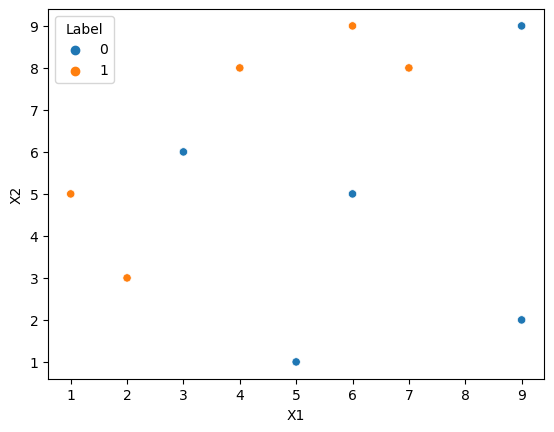

In [9]:
import seaborn as sns
sns.scatterplot(x=data["X1"],y=data["X2"],hue=data["Label"])

In [10]:
data["weights"]=1/data.shape[0]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
data1=DecisionTreeClassifier(max_depth=1)

In [14]:
x=data.iloc[:,0:2].values
y=data.iloc[:,2].values

In [15]:
data1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [16]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

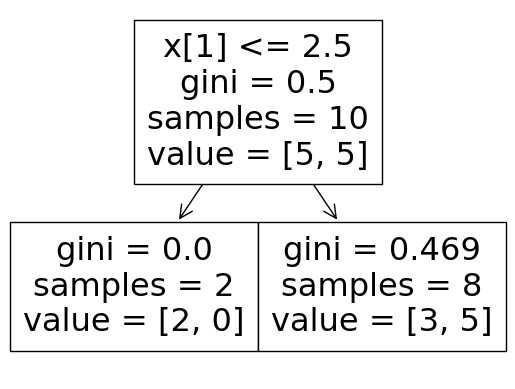

In [17]:
plot_tree(data1)

<Axes: >

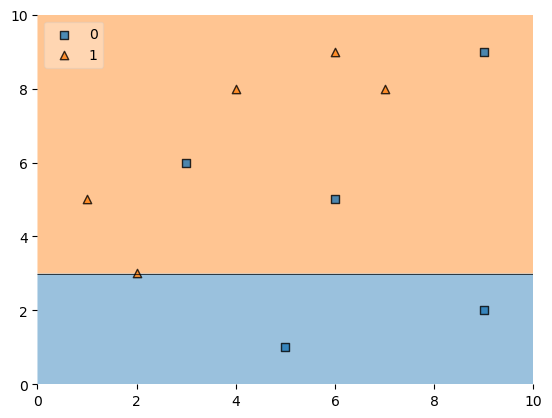

In [18]:
plot_decision_regions(x,y,clf=data1,legend=2)

In [19]:
data["y_pred"]=data1.predict(x)

In [20]:
data

,X1,X2,Label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [22]:
def calculate_model_error(error):
    return 0.5*np.log((1-error)/error)

In [24]:
alpha1=calculate_model_error(0.3)
alpha1


0.42364893019360184

In [32]:
def update_row_weights(row,alpha=0.423):
    if row['Label']==row["y_pred"]:
        return row["weights"]*np.exp(-alpha)
    else:
        return row["weights"]*np.exp(alpha)

In [33]:
data["updated_weights"]=data.apply(update_row_weights,axis=1)

In [34]:
data

,X1,X2,Label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [35]:
data['updated_weights'].sum()

0.9165153319682015

In [36]:
data['nomalized_weights'] = data['updated_weights']/data['updated_weights'].sum()

In [38]:
data['nomalized_weights'].sum()

1.0

In [39]:
data['cumsum_upper'] = np.cumsum(data['nomalized_weights'])

In [40]:
data['cumsum_lower'] = data['cumsum_upper'] - data['nomalized_weights']

In [42]:
data[['X1','X2','Label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,Label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [43]:
def create_new_dataset(data):

  indices = []

  for i in range(data.shape[0]):
    a = np.random.random()
    for index,row in data.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [44]:
index_values = create_new_dataset(data)

index_values

[8, 3, 4, 7, 9, 9, 6, 2, 5, 2]